In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their model:", their)
print("our model:", our)
data

their model: MDP of size 139 / 4 / 504 / 3.6
our model: MDP of size 9335 / 3 / 42068 / 4.5


,alpha,gamma,horizon,value_eps,model,start_value,iter,time
0,0.35,1.0,200,0.01,their,101.389673,1449,0.465340
1,0.35,1.0,200,0.01,our,100.553910,1535,46.181903
2,0.25,0.5,100,0.01,their,23.381773,545,0.171129
3,0.25,0.5,100,0.01,our,23.651323,602,18.118281
4,0.45,0.0,100,0.01,their,56.399823,658,0.223490
...,...,...,...,...,...,...,...,...
175,0.40,1.0,200,0.01,our,122.645761,1674,39.219630
176,0.10,1.0,200,0.01,their,18.041470,700,0.292860
177,0.10,1.0,200,0.01,our,18.035190,703,20.353799
178,0.20,0.0,50,0.01,their,9.336131,269,0.116016


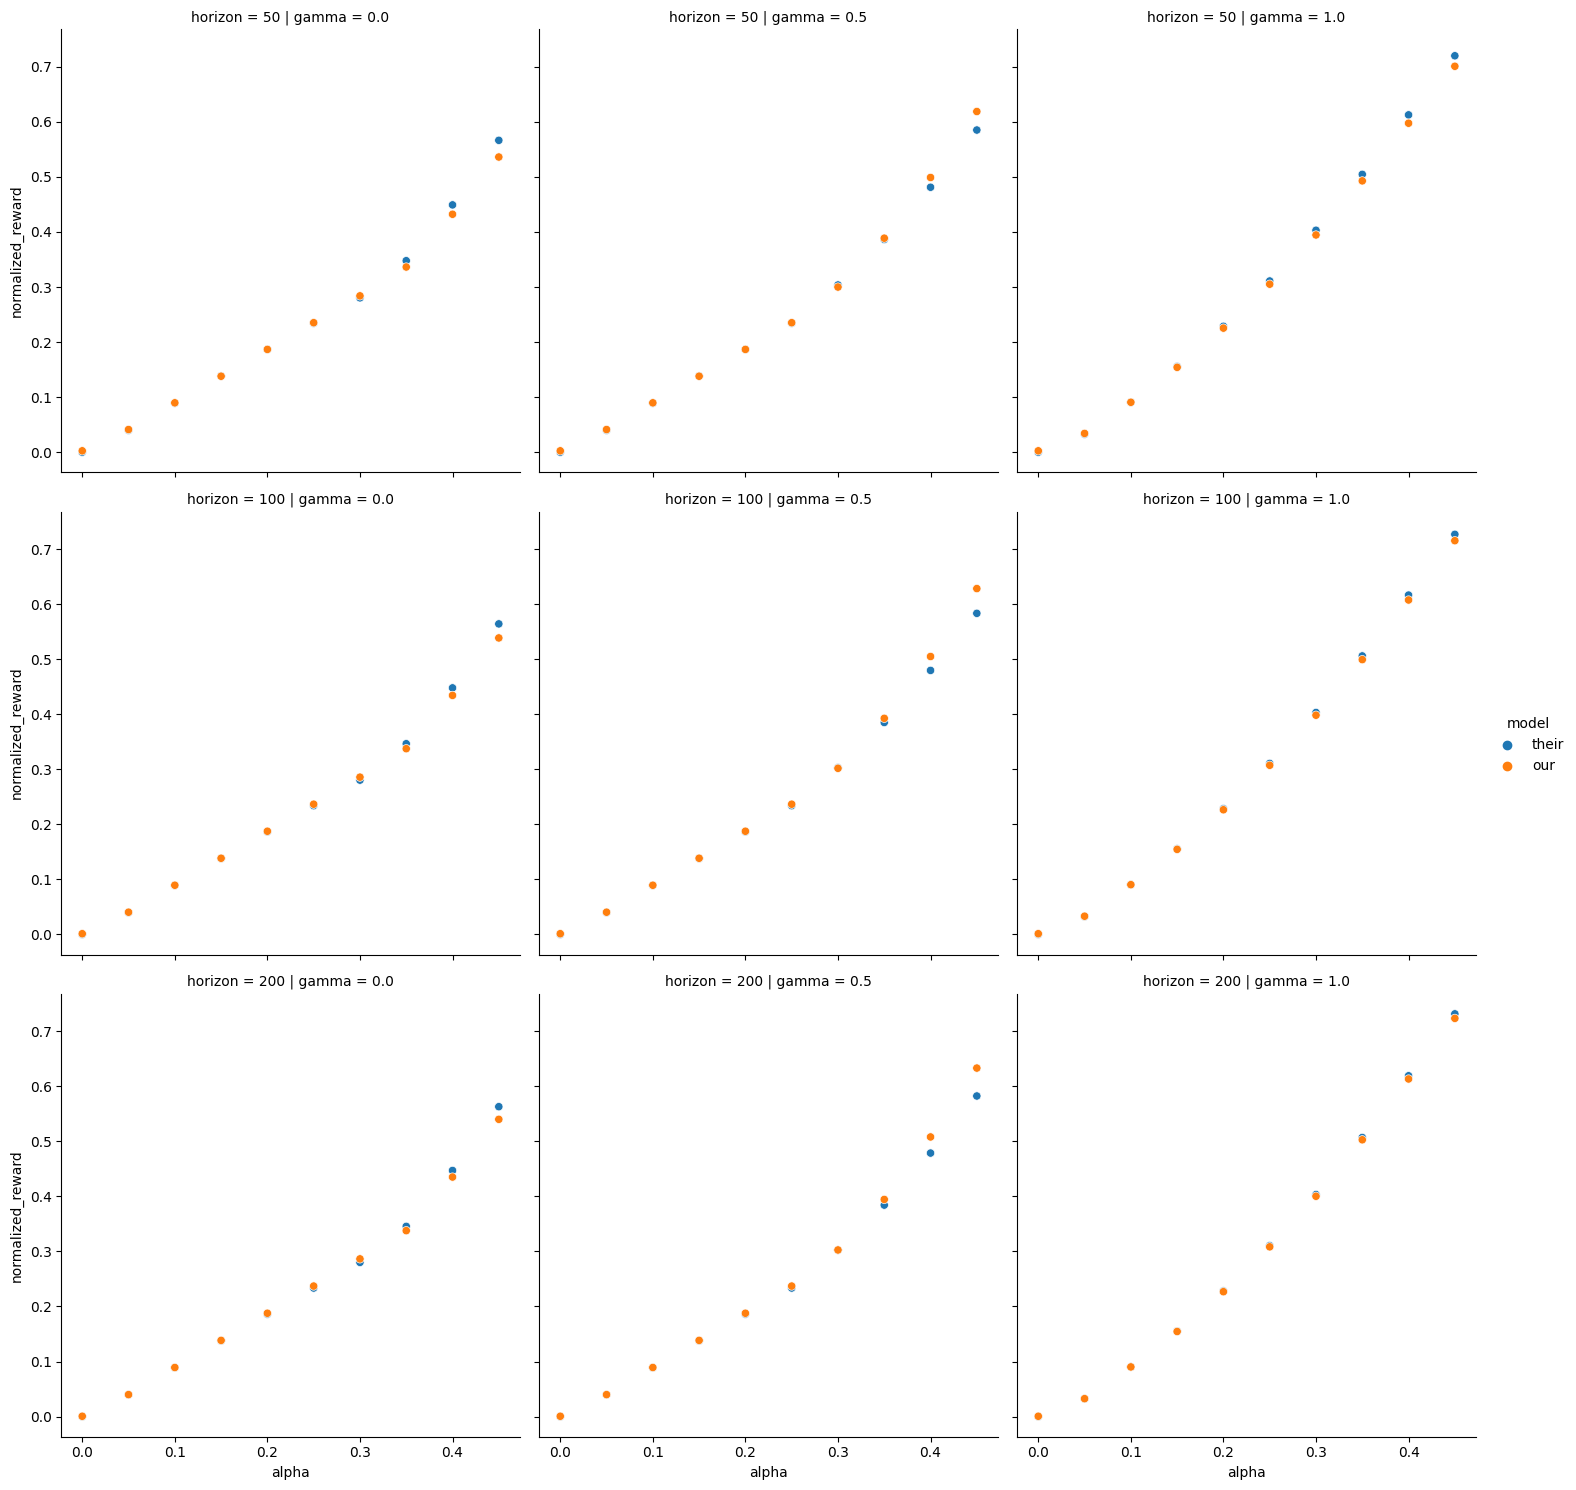

In [3]:
# Compare model w.r.t. reward
sns.relplot(
    data.assign(normalized_reward=lambda x: x.start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="horizon",
    hue="model",
)

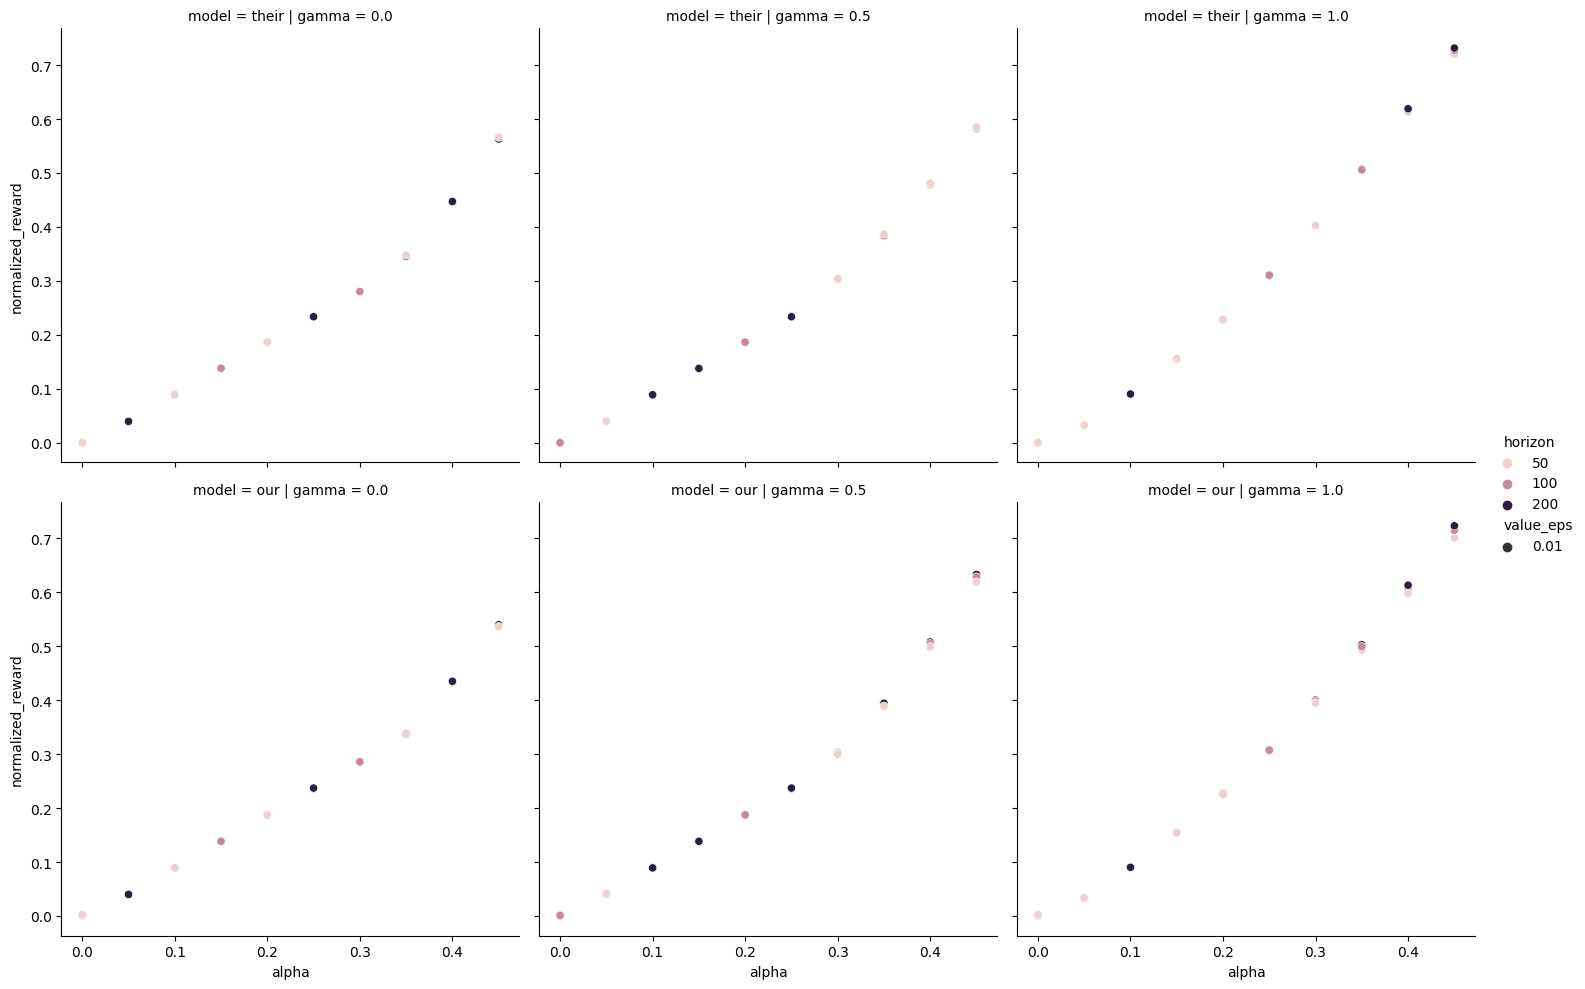

In [4]:
# Demonstrate effect of horizon
sns.relplot(
    data.assign(normalized_reward=lambda x: x.start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

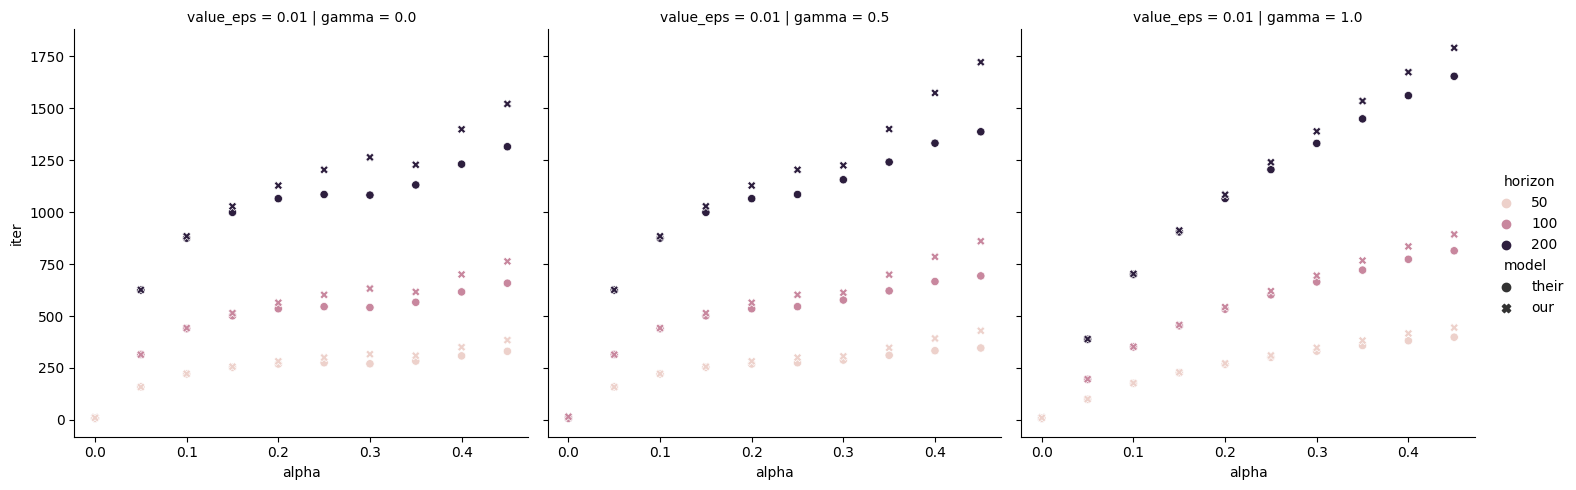

In [5]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

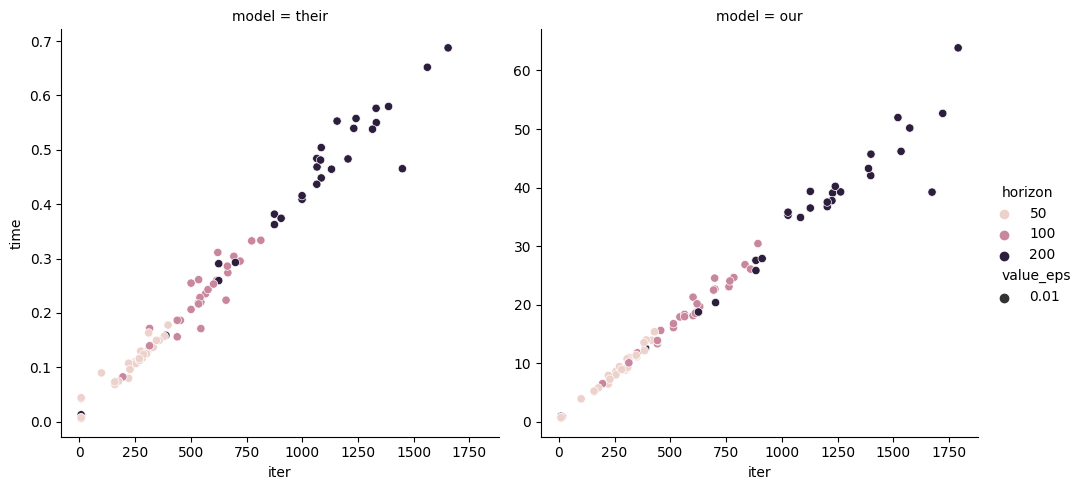

In [6]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="iter",
    y="time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)